# This notebook should be able to
1. Load a generative model
2. Create a dataset of samples drawn from the generative model with conditions
3. Map this dataset into a dataloader
4. Train a supervised model on this dataloader
5. Test the supervised model on the real cifar test-loader



In [1]:
import matplotlib.pyplot as plt
import itertools
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
import tensorflow_datasets as tfds
import torchvision
from tensorflow.keras.datasets import cifar10
import os
from torch.autograd import Variable
from torch.utils.data.dataset import Dataset

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [2]:
import g_arches
import model_to_fid
import ae_to_disentangle

model = g_arches.rgb_32_C_AE(100, 10).to(device)

report_fid_fjd = True
report_dci_sap = False


In [3]:
directory = 'model_sets/cyc_caegan_cifar/'

fids, fjds = [], []
dcis, saps = [], []
for filename in os.listdir(directory):
    if filename.endswith('.pt'):
        model.load_state_dict(torch.load(directory+filename))
        print(directory+filename)
        
        if report_fid_fjd == True:
            #samples_per at 1!
            fid, fjd = model_to_fid.get_fid_fjd(model, conditioning = True, samples_per_condition = 6)
            
            fids.append(fid)
            fjds.append(fjd)
            
        # For disentanglement scores, we will need models trained on Shapes3d...
        if report_dci_sap == True:
            dci, sap = ae_to_disentangle.get_disentanglement(model, 'CIFAR10')
            print(dci, sap)
            dcis.append(dci)
            saps.append(sap)
        
        
        ######### ALEX I CHANGED THE MODEL_TO_FID FILE TO HAVE BS = 512 (FROM 256)

model_sets/cyc_caegan_cifar/cyc_caegan_cifar_0_G.pt
Files already downloaded and verified
Files already downloaded and verified


Computing generated distribution:   0%|                                                         | 0/19 [00:00<?, ?it/s]

Loading reference statistics from datasets/cifar_train_stats.npz


Computing generated distribution: 100%|████████████████████████████████████████████████| 19/19 [04:32<00:00, 14.37s/it]


FID:  32.907297138216336
FJD:  39.69533544700198
model_sets/cyc_caegan_cifar/cyc_caegan_cifar_1_G.pt
Files already downloaded and verified
Files already downloaded and verified


Computing generated distribution:   0%|                                                         | 0/19 [00:00<?, ?it/s]

Loading reference statistics from datasets/cifar_train_stats.npz


Computing generated distribution: 100%|████████████████████████████████████████████████| 19/19 [04:02<00:00, 12.78s/it]


FID:  37.57332656105655
FJD:  43.69364554260346
model_sets/cyc_caegan_cifar/cyc_caegan_cifar_2_G.pt
Files already downloaded and verified
Files already downloaded and verified


Computing generated distribution:   0%|                                                         | 0/19 [00:00<?, ?it/s]

Loading reference statistics from datasets/cifar_train_stats.npz


Computing generated distribution: 100%|████████████████████████████████████████████████| 19/19 [04:14<00:00, 13.40s/it]


FID:  35.01244006582681
FJD:  42.4217072071292
model_sets/cyc_caegan_cifar/cyc_caegan_cifar_3_G.pt
Files already downloaded and verified
Files already downloaded and verified


Computing generated distribution:   0%|                                                         | 0/19 [00:00<?, ?it/s]

Loading reference statistics from datasets/cifar_train_stats.npz


Computing generated distribution: 100%|████████████████████████████████████████████████| 19/19 [04:18<00:00, 13.59s/it]


FID:  39.84029426269524
FJD:  48.09859641678213
model_sets/cyc_caegan_cifar/cyc_caegan_cifar_4_G.pt
Files already downloaded and verified
Files already downloaded and verified


Computing generated distribution:   0%|                                                         | 0/19 [00:00<?, ?it/s]

Loading reference statistics from datasets/cifar_train_stats.npz


Computing generated distribution: 100%|████████████████████████████████████████████████| 19/19 [04:09<00:00, 13.14s/it]


FID:  32.072965243946214
FJD:  38.65042371698064
model_sets/cyc_caegan_cifar/cyc_caegan_cifar_5_G.pt
Files already downloaded and verified
Files already downloaded and verified


Computing generated distribution:   0%|                                                         | 0/19 [00:00<?, ?it/s]

Loading reference statistics from datasets/cifar_train_stats.npz


Computing generated distribution: 100%|████████████████████████████████████████████████| 19/19 [04:15<00:00, 13.45s/it]


FID:  38.010561557336416
FJD:  45.989573222006356
model_sets/cyc_caegan_cifar/cyc_caegan_cifar_6_G.pt
Files already downloaded and verified
Files already downloaded and verified


Computing generated distribution:   0%|                                                         | 0/19 [00:00<?, ?it/s]

Loading reference statistics from datasets/cifar_train_stats.npz


Computing generated distribution: 100%|████████████████████████████████████████████████| 19/19 [04:10<00:00, 13.20s/it]


FID:  37.410085667682665
FJD:  45.66606671539989
model_sets/cyc_caegan_cifar/cyc_caegan_cifar_7_G.pt
Files already downloaded and verified
Files already downloaded and verified


Computing generated distribution:   0%|                                                         | 0/19 [00:00<?, ?it/s]

Loading reference statistics from datasets/cifar_train_stats.npz


Computing generated distribution: 100%|████████████████████████████████████████████████| 19/19 [04:08<00:00, 13.10s/it]


FID:  31.334213118265836
FJD:  38.57655510228324
model_sets/cyc_caegan_cifar/cyc_caegan_cifar_8_G.pt
Files already downloaded and verified
Files already downloaded and verified


Computing generated distribution:   0%|                                                         | 0/19 [00:00<?, ?it/s]

Loading reference statistics from datasets/cifar_train_stats.npz


Computing generated distribution: 100%|████████████████████████████████████████████████| 19/19 [04:16<00:00, 13.48s/it]


FID:  35.199414594681855
FJD:  43.00586086078829
model_sets/cyc_caegan_cifar/cyc_caegan_cifar_9_G.pt
Files already downloaded and verified
Files already downloaded and verified


Computing generated distribution:   0%|                                                         | 0/19 [00:00<?, ?it/s]

Loading reference statistics from datasets/cifar_train_stats.npz


Computing generated distribution: 100%|████████████████████████████████████████████████| 19/19 [04:10<00:00, 13.20s/it]


FID:  37.8489813238773
FJD:  46.529492460107576


In [4]:
import statistics
fid_mean = sum(fids) / len(fids)
fid_var = sum((x-fid_mean)**2 for x in fids) / len(fids)
fid_stdev = fid_var**0.5
fid_se = fid_stdev / len(fids)
print('fid mean and se', fid_mean, '+-', fid_se)


fjd_mean = sum(fjds) / len(fjds)
fjd_var = sum((x-fjd_mean)**2 for x in fjds) / len(fjds)
fjd_stdev = fjd_var**0.5
fjd_se = fjd_stdev / len(fjds)
print('fid mean and se', fjd_mean, '+-', fjd_se)



fid mean and se 35.72095795335852 +- 0.272518247027721
fid mean and se 43.23272566910828 +- 0.3227676212273982


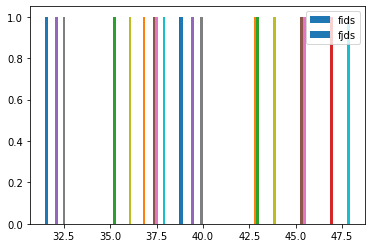

In [5]:
plt.hist(fids, bins = 5, label = 'fids')
plt.hist(fjds, bins = 5, label = 'fjds')
plt.legend(loc = 'best')
plt.show()

In [6]:
def one_hot_embedding(labels):
    labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)
    return torch.squeeze(labels)